In [52]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [54]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Преобразование категориальных меток в one-hot encoding

In [55]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [56]:
# Добавление измерения для канала (т.к. у нас один канал изображения)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [57]:
# Определение архитектуры модели
input_shape = (28, 28, 1)
model = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [58]:
# Компиляция модели
model.compile(optimizer=RMSprop(),  # Заменяем оптимизатор на RMSprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# Аугментация данных
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

In [60]:
# Обучение модели
history = model.fit(datagen.flow(x_train.reshape((-1, 28, 28, 1)), y_train_cat, batch_size=32),
                    epochs=20,
                    validation_data=(x_test.reshape((-1, 28, 28, 1)), y_test_cat))

Epoch 1/20
1875/1875 [==============================] - 76s 40ms/step - loss: 0.6832 - accuracy: 0.7573 - val_loss: 0.4583 - val_accuracy: 0.8319
Epoch 2/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4687 - accuracy: 0.8308 - val_loss: 0.5751 - val_accuracy: 0.7998
Epoch 3/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4262 - accuracy: 0.8489 - val_loss: 0.5210 - val_accuracy: 0.8189
Epoch 4/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.3979 - accuracy: 0.8588 - val_loss: 0.3968 - val_accuracy: 0.8550
Epoch 5/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3776 - accuracy: 0.8647 - val_loss: 0.3268 - val_accuracy: 0.8822
Epoch 6/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3696 - accuracy: 0.8691 - val_loss: 0.3375 - val_accuracy: 0.8805
Epoch 7/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.3550 - accuracy: 0.8761 - val_loss: 0.3952 -

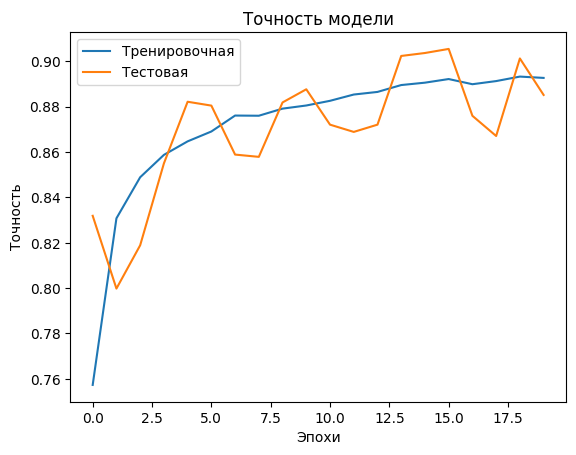

In [61]:
# Построение графиков точности и потерь
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

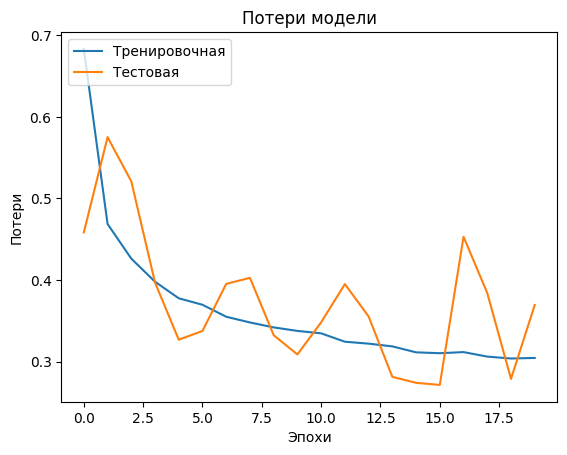

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

In [63]:
# Вывод информации о модели
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                      

Что мы сделали:
1. Увеличили количество эпох до 20.
2. Добавили Dropout после первого полносвязного слоя.
3. Увеличили количество нейронов во втором полносвязном слое.
4. Заменили оптимизатор Adam на RMSprop.
5. Добавили аугментацию данных.

Результат:
1. Точность на тренировочном наборе данных увеличилась с 0.8417 до 0.8927.
2. Точность на валидационном наборе данных увеличилась с 0.8722 до 0.8852.
3. Потери на тренировочном наборе данных уменьшились с 0.4333 до 0.3045.
4. Потери на валидационном наборе данных также увеличились с 0.3326 до 0.3693.

Вывод: 
Несмотря на увеличение точности на тренировочном наборе данных, модель начала показывать признаки переобучения после 10-11 эпохи, что привело к увеличению потерь на валидационном наборе данных. 